<a href="https://colab.research.google.com/github/AnshikaSolanki24/AI-Lab/blob/main/ai_project(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 (AI LAB)**

*Apache Web Server Log Analysis*

First we install the required libraries and then import the required modules.

In [2]:
!pip install advertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.6 MB/s eta 0:00:00


ModuleNotFoundError: ignored

In [3]:
pip install ua-parser

In [5]:
pip install squarify

In [6]:
import advertools as adv
import pandas as pd
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import matplotlib.pyplot as plt
import ua_parser
pd.options.display.max_columns = None
import squarify

Cleaning the data and then later combining it using advertools. It is important to note here that even though the log file contains a lot of rows but the code ran and parsed only 60,690 lines.

In [8]:
%%time
adv.logs_to_df(
    log_file='/content/log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed          60,690 lines.
CPU times: user 510 ms, sys: 140 ms, total: 649 ms
Wall time: 626 ms


Converting to parquet format because data is too large and this extension is going to make data handling easy.

Next, we convert the date and time column into an appropriate format by specifying the pattern in which the said data is available.

In [9]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

In [10]:
file_path = '/content/log_file.log'

with open(file_path, 'r') as file:
    row_count = sum(1 for _ in file)

print(f"Number of rows in the file: {row_count}")

Number of rows in the file: 91178


In [11]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,87.116.74.253,1811,1811,0.029851,0.029851,87-116-74-253.ip.btc-net.bg,,87.116.74.253,None
1,130.204.199.252,1209,3020,0.019928,0.049778,602ad0cd481f.softphone.blizoo.bg,,130.204.199.252,None
2,212.39.89.183,1111,4131,0.018312,0.068091,212-39-89-183.ip.btc-net.bg,,212.39.89.183,None
3,149.62.202.254,985,5116,0.016236,0.084326,None,None,None,[Errno 1] Unknown host
4,91.196.124.220,968,6084,0.015955,0.100282,ns77.superhosting.bg,,91.196.124.220,None


**1.Top 10 hits hourly basis**

In [12]:
 #Calculate the top visitors by counting unique client IP addresses
top_visitors = logs_df['client'].value_counts().head(10)

# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(10)

print("Top Visitors:")
print(top_visitors)

print("\nFrequency of Requests:")
print(frequency_of_requests)

Top Visitors:
87.116.74.253      1811
130.204.199.252    1209
212.39.89.183      1111
149.62.202.254      985
91.196.124.220      968
91.139.164.207      831
212.39.89.53        736
212.39.89.155       717
195.24.88.168       706
46.238.56.74        705
Name: client, dtype: int64

Frequency of Requests:
/wp-admin/admin-ajax.php                                                                1046
/wp-content/uploads/2021/05/HLGN-Logo.png                                                836
/?wc-ajax=get_refreshed_fragments                                                        788
/                                                                                        535
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                        351
/category/nargileta/                                                                     220
/wp-content/plugins/woo-discount-rules/v2/Assets/Js/awdr-dynamic-price.js?ver=2.3.13     191
/wp-content/plugins/woocommerce-econt/inc/js

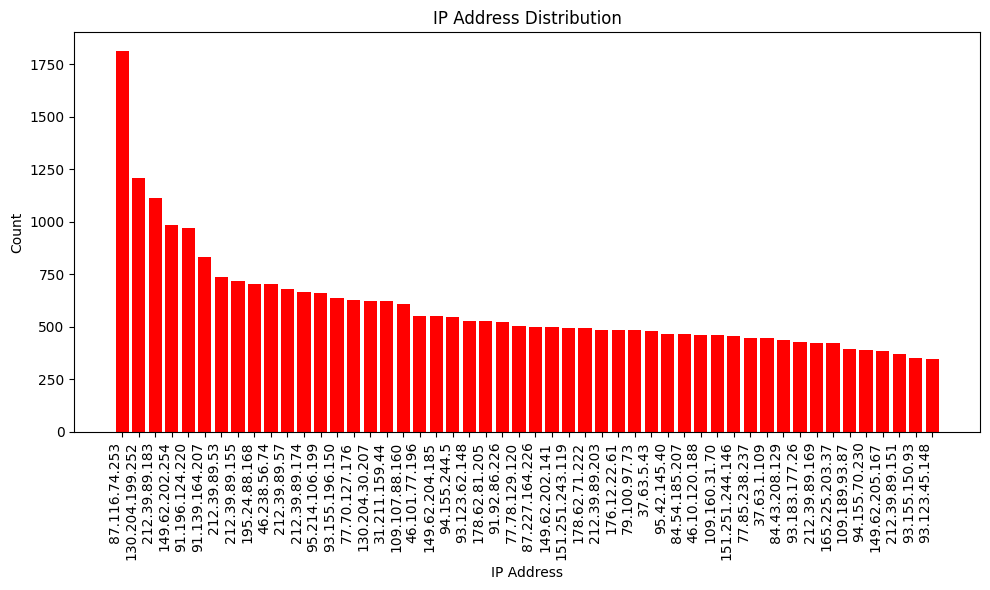

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(50), host_df['count'].head(50), color='red')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distribution')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Following shows top 15 frequency requests**

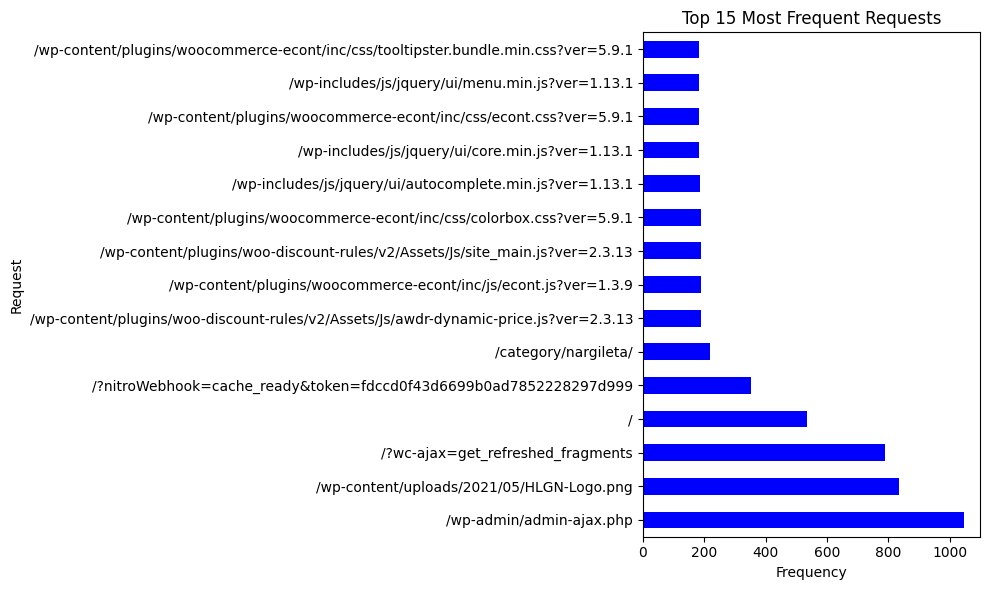

In [14]:
# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(15)
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='blue')
plt.ylabel('Request')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Requests')
plt.tight_layout()
plt.show()

**Following code and plot shows status codes. It is clear from the pie chart that 200 is the most evident one indicating that the page request successfully gets completed in almost all cases.**

   status  count
0     200  56246
1     201      2
2     206      6
3     301    281
4     302     50
5     304   2559
6     400      3
7     401     10
8     403     11
9     404   1318
10    405      7
11    406     55
12    500    121


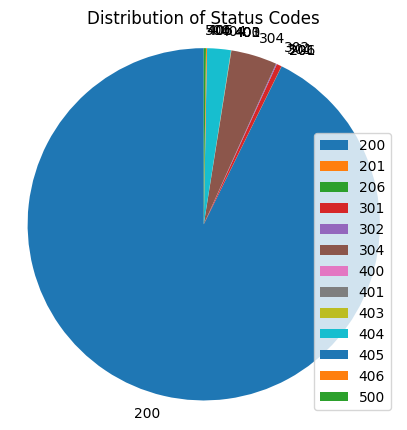

In [26]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)
# Plot the data using a pie chart
plt.figure(figsize=(5, 5))
plt.pie(status_df['count'], radius=0.8,labels=status_df['status'],startangle=90,autopct='')
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

**Following code runs the query to show number of requests by IP address and by hour.**

            client  hour  request_count
0    100.12.47.211     6            148
1   104.143.83.241     8              3
2   104.143.83.241    13             12
3  104.196.137.185    14              1
4  104.196.146.182    12              1
            client  day_of_week  request_count
0    100.12.47.211            1            148
1   104.143.83.241            0              6
2   104.143.83.241            1              9
3  104.196.137.185            0              1
4  104.196.146.182            0              1


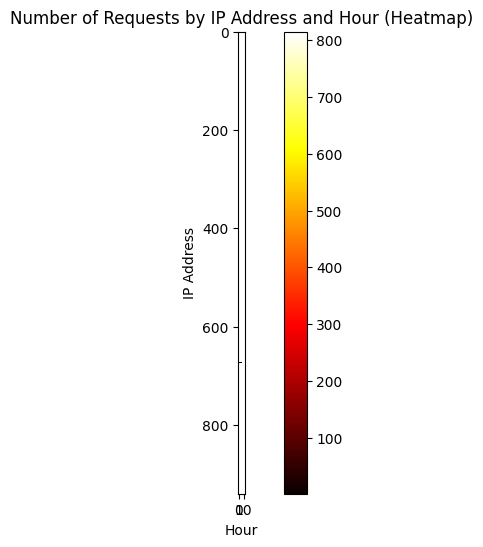

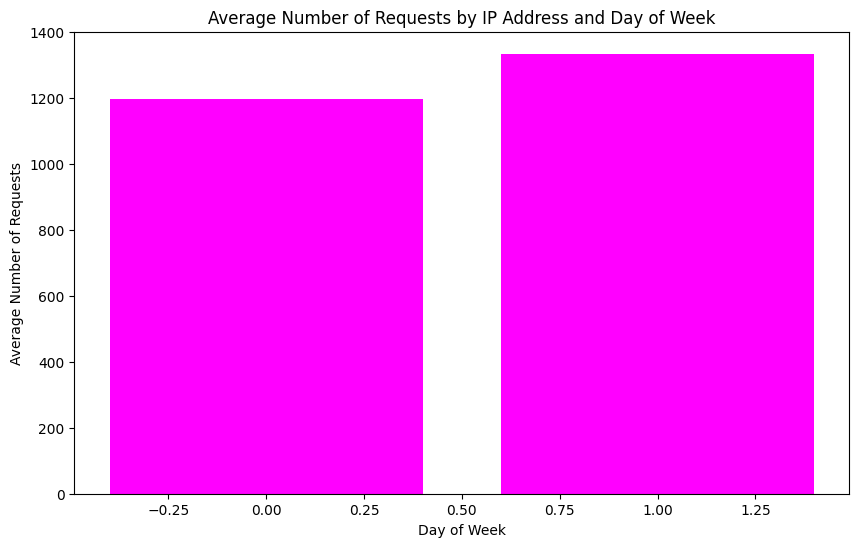

In [30]:
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

print(ip_hourly_counts.head(5))
print(ip_weekly_avg.head(5))

# Convert the "datetime" column to datetime data type, setting utc=True
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)

# Extract hour and day of the week from the "datetime" column
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek

# Group by IP address and hour, and calculate the count of requests
ip_hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(ip_hourly_counts.pivot_table(index='client', columns='hour', values='request_count', aggfunc=sum), cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('IP Address')
plt.title('Number of Requests by IP Address and Hour (Heatmap)')
plt.colorbar()

# Group by IP address and day of the week, and calculate the average request count
ip_weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')

# Visualize the weekly average request counts
plt.figure(figsize=(10, 6))
plt.bar(ip_weekly_avg['day_of_week'], ip_weekly_avg['request_count'], color='magenta')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Requests')
plt.title('Average Number of Requests by IP Address and Day of Week')

# Show the plots
plt.show()

In [32]:
pip install user-agents

In [34]:
from user_agents import parse
import matplotlib.pyplot as plt

**Following code shows number of hits by browser**

   browser  total_hits
0   Chrome       25409
5   Safari       17806
4    Other       12983
2  Firefox        2016
3    Opera        1709
1     Edge         746


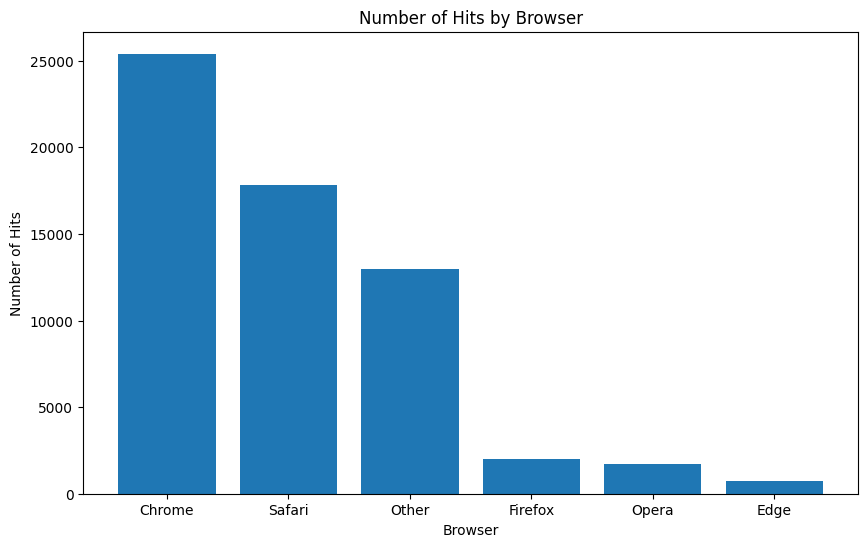

In [35]:
import matplotlib.pyplot as plt
# Parse user agents using the user-agents library
def extract_browser(user_agent):
    ua = parse(user_agent)
    browser_family = ua.browser.family.lower()

    if 'chrome' in browser_family:
        return 'Chrome'
    elif 'firefox' in browser_family:
        return 'Firefox'
    elif 'safari' in browser_family:
        return 'Safari'
    elif 'edge' in browser_family:
        return 'Edge'
    elif 'opera' in browser_family:
        return 'Opera'
    elif 'brave' in browser_family:
        return 'Brave'
    elif 'internet explorer' in browser_family or 'msie' in browser_family:
        return 'Internet Explorer'
    else:
        return 'Other'

logs_df['browser'] = logs_df['user_agent'].apply(extract_browser)

# Group data by browser and count hits
browser_hits = logs_df.groupby('browser').size().reset_index(name='total_hits')

# Sort by total hits
browser_hits = browser_hits.sort_values(by=['total_hits'], ascending=False)
print(browser_hits)
# Create a bar chart of the number of hits for each browser
plt.figure(figsize=(10, 6))
plt.bar(browser_hits['browser'], browser_hits['total_hits'])

# Add labels and title
plt.xlabel('Browser')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Browser')

# Show the plot
plt.show()

site  Unknown  autodiscover.nargile.bg  \
hour                                     
18      115.0                      NaN   
17      172.0                      NaN   
16      261.0                      NaN   
15      150.0                      NaN   
14      596.0                      NaN   

site  com.google.android.googlequicksearchbox  cpanel.nargile.bg  \
hour                                                               
18                                        NaN                NaN   
17                                        1.0                NaN   
16                                        NaN                NaN   
15                                        NaN                NaN   
14                                        NaN                NaN   

site  cpcalendars.nargile.bg  cpcontacts.nargile.bg  l.facebook.com  \
hour                                                                  
18                       NaN                    NaN             NaN   
17             

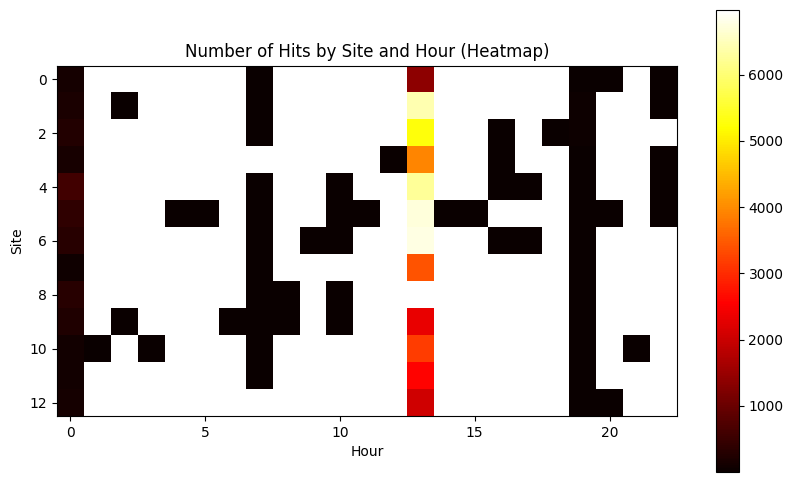

In [36]:
# Parse the referer using the function defined above
def extract_site(referer):
    if pd.isna(referer):
        return 'Direct'
    else:
        referer_parts = referer.split('/')
        if len(referer_parts) >= 3:
            return referer_parts[2]
        else:
            return 'Unknown'

logs_df['site'] = logs_df['referer'].apply(extract_site)

# Group data by site and hour and count hits
site_hourly_hits = logs_df.groupby(['site', 'hour']).size().reset_index(name='hits')

# Pivot the table for site distribution per hour
site_hourly_pivot = site_hourly_hits.pivot(index='hour', columns='site', values='hits')

# Sort by total hits for each hour
site_hourly_pivot = site_hourly_pivot.sort_values(by=['hour'], ascending=False)
print(site_hourly_pivot.head(5))
# Create a heatmap of the number of hits for each site and hour
plt.figure(figsize=(10, 6))
plt.imshow(site_hourly_pivot, cmap='hot')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Site')
plt.title('Number of Hits by Site and Hour (Heatmap)')
plt.colorbar()
plt.show()

**Following code shows number of hits by hour**

    hour  total_hits
0      6        2184
1      7        2686
2      8        3298
3      9        2603
4     10        7308
5     11        3528
6     12        7137
7     13        7183
8     14        6881
9     15        4122
10    16        5604
11    17        6621
12    18        1514


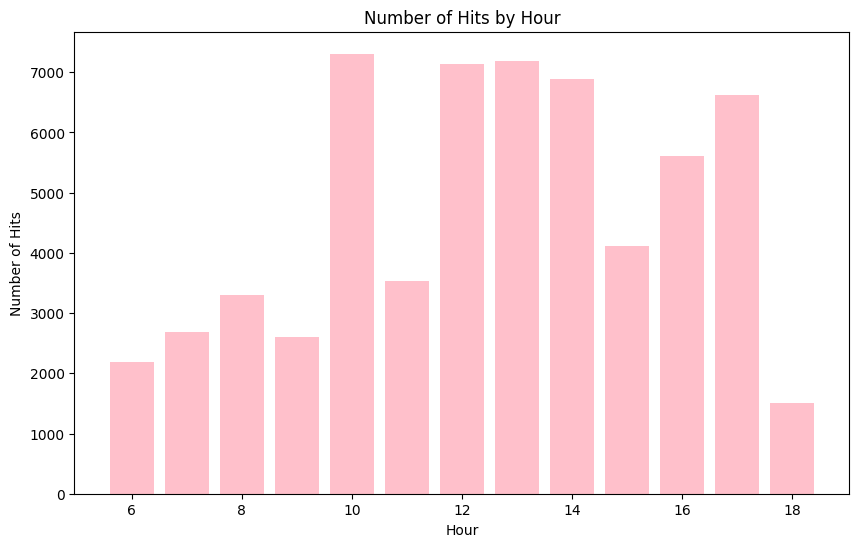

In [43]:
# Group data by hour and count hits
hourly_hits = logs_df.groupby('hour').size().reset_index(name='total_hits')
print(hourly_hits)
# Sort by total hits
#hourly_hits = hourly_hits.sort_values(by=['total_hits'], ascending=False)

# Create a bar chart of the number of hits for each hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_hits['hour'], hourly_hits['total_hits'],color='pink')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Hour')

# Show the plot
plt.show()

**Following code shows total hits by browser**

In [38]:
%%time
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

CPU times: user 1.32 s, sys: 38.6 ms, total: 1.36 s
Wall time: 1.37 s


In [39]:
# Create a new dataframe that only contains the `ua_family` and `ua_os.family` columns
browser_os_df = ua_df[['ua_family', 'ua_os.family']]
# Count the number of occurrences of each browser and operating system combination
browser_os_counts = browser_os_df.groupby(['ua_family', 'ua_os.family']).size().reset_index(name='count')
print(browser_os_counts.head(10))

               ua_family ua_os.family  count
0              AhrefsBot        Other     55
1           AwarioRssBot        Other      1
2              CFNetwork          iOS      2
3                 Chrome      Android     97
4                 Chrome        Linux      7
5                 Chrome     Mac OS X   2289
6                 Chrome      Windows   8465
7          Chrome Mobile      Android  12540
8  Chrome Mobile WebView      Android    895
9      Chrome Mobile iOS          iOS   1116


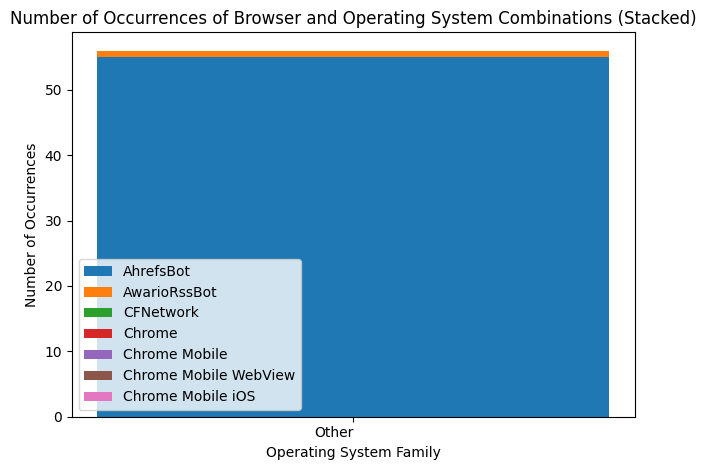

In [44]:
df = browser_os_counts.head(10)

# Get unique browser names for legend
browser_names = df['ua_family'].unique()

# Initialize the bottom for stacking
bottom = None

# Create a stacked bar chart
for browser_name in browser_names:
    browser_data = df[df['ua_family'] == browser_name]
    plt.bar(browser_data['ua_os.family'], browser_data['count'], label=browser_name, bottom=bottom)
    if bottom is None:
        bottom = browser_data['count']
    else:
        bottom += browser_data['count']

# Add labels and title
plt.xlabel('Operating System Family')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Browser and Operating System Combinations (Stacked)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.tight_layout()
plt.show()